In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('USA_2013-2013_Cars.csv')

F:\temp\ipykernel_11252\886359415.py:1: DtypeWarning: Columns (12,13,14,15,16,17,89,91,92,94,97,127,130,140,141,144,146,147,150,157,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('USA2013-2022CARS - USA2012-2022CARS.csv.csv')


In [3]:
# Filling in all null values with 0
df.fillna(0, inplace=True)

In [4]:
# Hot-encoding to represent categorical variables as numerical values
value_mapping = {
    "Turbocharged": 1,
    "Other" : 1,
    "Naturally Aspirated": 0,
    "Supercharged": 2,
    "Turbocharged+Supercharged": 3
}
value_mapping2 = {"Electrical Regen Brake":1,
                 "Other" : 1,
                 "Not applicable": 0,
                  "Hydraulic Regen Brake": 1
}
value_mapping3 = {"[=0]5":5.5,
                  "[=0]6":6.5,
                  "[=0]4":4.5
}
df["Batt Energy Capacity (Amp-hrs)"] = df["Batt Energy Capacity (Amp-hrs)"].replace(value_mapping3)
df["Air Aspiration Method Desc"] = df["Air Aspiration Method Desc"].replace(value_mapping)
df["Regen Braking Type Desc"] = df["Regen Braking Type Desc"].replace(value_mapping2)
df.to_csv('USA2013-2022CARS_-_USA2012-2022CARS.csv.csv', index=False)
df.to_csv('USA2013-2022CARS_-_USA2012-2022CARS.csv.csv', index=False)

In [5]:
df.describe()

,Model Year,Index (Model Type Index),Eng Displ,# Cyl,Trans in FE Guide (MFR entered for data entered after May 13 2011),City FE (Guide) - Conventional Fuel,Hwy FE (Guide) - Conventional Fuel,Comb FE (Guide) - Conventional Fuel,Guzzler?,Air Aspiration Method Desc,...,City CO2 Rounded Adjusted,Hwy CO2 Rounded Adjusted,Comb CO2 Rounded Adjusted (as shown on FE Label),CO2-PHEV Composite Rounded Adjusted Combined CO2,240V Charge Time at 240 volts (hours),120V Charge time at 120 Volts (hours),PHEV Total Driving Range (rounded to nearest 10 miles)DISTANCE,City PHEV Composite MPGe,Hwy PHEV Composite MPGe,Comb PHEV Composite MPGe
count,12161.000000,12161.000000,12161.000000,12161.000000,12161.0,12161.000000,12161.000000,12161.000000,12161.0,12161.000000,...,12161.000000,12161.000000,12161.000000,12161.0,12161.0,12161.0,12161.0,12161.0,12161.0,12161.0
mean,2017.495847,227.994326,3.185322,5.666228,0.0,20.391497,27.499219,23.007894,0.0,0.552586,...,468.314201,340.560069,410.920730,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.838325,239.270054,1.356666,1.867226,0.0,5.936292,6.180071,5.938578,0.0,0.596358,...,121.066999,77.853848,99.906824,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2013.000000,1.000000,0.900000,3.000000,0.0,8.000000,11.000000,9.000000,0.0,0.000000,...,152.000000,149.000000,151.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2015.000000,38.000000,2.000000,4.000000,0.0,16.000000,23.000000,19.000000,0.0,0.000000,...,384.000000,285.000000,340.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2018.000000,116.000000,3.000000,6.000000,0.0,20.000000,27.000000,22.000000,0.0,1.000000,...,456.000000,330.000000,401.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2020.000000,400.000000,3.800000,6.000000,0.0,23.000000,31.000000,26.000000,0.0,1.000000,...,542.000000,386.000000,471.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2022.000000,999.000000,8.400000,16.000000,0.0,58.000000,60.000000,59.000000,0.0,3.000000,...,1135.000000,818.000000,979.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Choosing features for new data file
df1 = df[['Model Year','Division','Carline', 'Eng Displ', '# Cyl','# Gears','Air Aspiration Method Desc','# Batteries','Total Voltage for Battery Pack(s)','Batt Energy Capacity (Amp-hrs)','Regen Braking Type Desc','$ You Spend over 5 years (increased amount spent in fuel costs over 5 years - on label)','Comb CO2 Rounded Adjusted (as shown on FE Label)','Annual Fuel1 Cost - Conventional Fuel']] 

In [7]:
# Renaming for simplicity
df1 = df1.rename(columns={"Model Year": "Year", 
                          "Division": "Brand",
                          "Carline": "Model",
                         "Eng Displ": "Displ",
                         "# Cyl": "Cyl",
                         "# Gears": "Gears",
                          "Air Aspiration Method Desc": "Air_Aspiration",
                         "# Batteries": "Batteries",
                         "Total Voltage for Battery Pack(s)": "Total_Voltage",
                         "Batt Energy Capacity (Amp-hrs)": "Battery_Capacity",
                         "Regen Braking Type Desc": "Regen_Brake",
                         "$ You Spend over 5 years (increased amount spent in fuel costs over 5 years - on label)": "Amt_Spent",
                         "Comb CO2 Rounded Adjusted (as shown on FE Label)": "Comb_CO2",
                         "Annual Fuel1 Cost - Conventional Fuel": "Fuel_Cost"})

In [8]:
# Viewing correlation for features using color for easier visibility
corr = df1.corr(numeric_only = True)  
corr.style.background_gradient(cmap='coolwarm')  

,Year,Displ,Cyl,Gears,Air_Aspiration,Batteries,Total_Voltage,Regen_Brake,Comb_CO2,Fuel_Cost
Year,1.000000,-0.048996,-0.033926,0.328478,0.165280,0.093940,0.028938,0.081830,-0.028348,-0.349075
Displ,-0.048996,1.000000,0.923490,0.219975,-0.174348,-0.058737,-0.064493,-0.062167,0.847919,0.748792
Cyl,-0.033926,0.923490,1.000000,0.245919,-0.046457,-0.046510,-0.069371,-0.054119,0.830018,0.748984
Gears,0.328478,0.219975,0.245919,1.000000,0.290827,-0.082303,-0.152894,-0.105098,0.266298,0.150904
Air_Aspiration,0.165280,-0.174348,-0.046457,0.290827,1.000000,-0.035371,-0.105951,-0.075746,0.017575,0.038526
Batteries,0.093940,-0.058737,-0.046510,-0.082303,-0.035371,1.000000,0.805528,0.849387,-0.206637,-0.169747
Total_Voltage,0.028938,-0.064493,-0.069371,-0.152894,-0.105951,0.805528,1.000000,0.859560,-0.263489,-0.209836
Regen_Brake,0.081830,-0.062167,-0.054119,-0.105098,-0.075746,0.849387,0.859560,1.000000,-0.246561,-0.203869
Comb_CO2,-0.028348,0.847919,0.830018,0.266298,0.017575,-0.206637,-0.263489,-0.246561,1.000000,0.867483
Fuel_Cost,-0.349075,0.748792,0.748984,0.150904,0.038526,-0.169747,-0.209836,-0.203869,0.867483,1.000000


In [9]:
# X = features, Y = output
X = df1[['Displ','Cyl','Gears','Air_Aspiration','Batteries','Total_Voltage','Battery_Capacity','Regen_Brake','Fuel_Cost']]
Y = df1[['Comb_CO2']]

In [10]:
# Splititng dataset into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

In [11]:
# Fitting the data and predicting
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression() 
linreg.fit(X_train, Y_train)    
Y_pred = linreg.predict(X_test)  

In [12]:
print (Y_pred) # Predicted values
print(Y_test)

[[452.76172111]
 [449.27500409]
 [345.40903107]
 ...
 [475.54549322]
 [525.72504872]
 [438.45953112]]
       Comb_CO2
3048        413
5715        589
51          310
2918        324
4835        501
...         ...
11290       313
6272        401
11012       505
3180        478
8125        521

[4865 rows x 1 columns]


In [13]:
# Calculating r2 score for accuracy
r2_score = linreg.score(X_test,Y_test)
print("Accuracy:",r2_score*100,'%')

Accuracy: 86.59459713146158 %


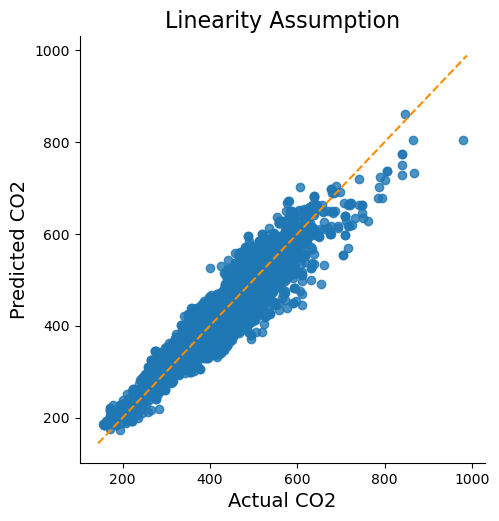

In [14]:
Y_test['preds'] = Y_pred  
# Plotting the observed vs predicted values  
sns.lmplot(x='Comb_CO2', y='preds', data=Y_test, fit_reg=False, height=5)  
      
# Plotting the diagonal line  
line_coords = np.arange(Y_test[['Comb_CO2', 'preds']].min().min()-10,   
                        Y_test[['Comb_CO2', 'preds']].max().max()+10)  
plt.plot(line_coords, line_coords,  # X and y points  
         color='darkorange', linestyle='--')  
  
plt.ylabel('Predicted CO2', fontsize=14)  
plt.xlabel('Actual CO2', fontsize=14)  
plt.title('Linearity Assumption', fontsize=16)  
plt.show()  

In [15]:
print(Y_test)
Y_test.to_csv("Predictions.csv")

       Comb_CO2       preds
3048        413  452.761721
5715        589  449.275004
51          310  345.409031
2918        324  349.310723
4835        501  465.400699
...         ...         ...
11290       313  340.056818
6272        401  396.672214
11012       505  475.545493
3180        478  525.725049
8125        521  438.459531

[4865 rows x 2 columns]


In [16]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [17]:
# Converting the year to be in data format to work with time series model
import datetime  
df1['Year'] = df1['Year'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))  

In [18]:
# Setting the model year as the index
df2 = df1[['Year','Comb_CO2']].set_index(['Year'])
# Saving the dataset as a new csv file to be able to parse out year
df2.to_csv('test.csv')

In [19]:
# Created function to parse out the year
def parser(x):
    return pd.datetime.strptime(x, '%Y-%m-%d')
y = pd.read_csv('test.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

In [20]:
# Setting each time period to begin at year end
y.index = y.index.to_period('Y')

In [21]:
# Accounting for seasonality, trend, and noise in the data
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [22]:
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

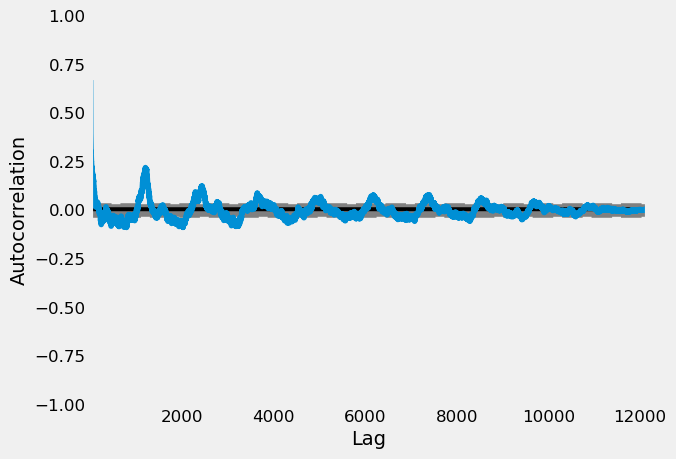

In [23]:
# Plotting autocorrelation of the data
autocorrelation_plot(y)
pyplot.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

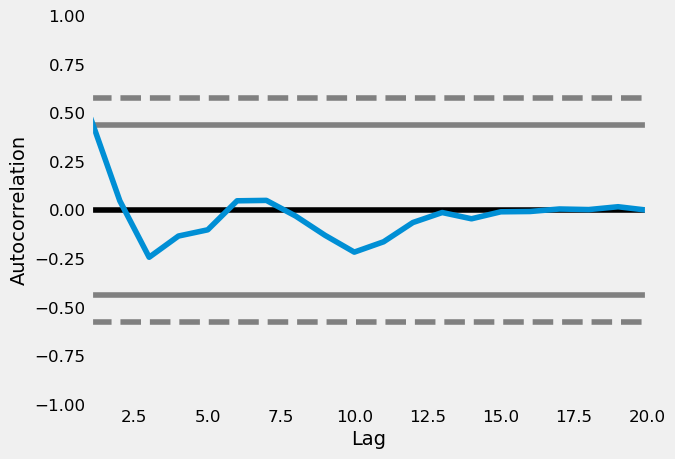

In [24]:
# Plotting autocorrelation of exact year
autocorrelation_plot(y['2022'][0:20])

Test RMSE: 74.879


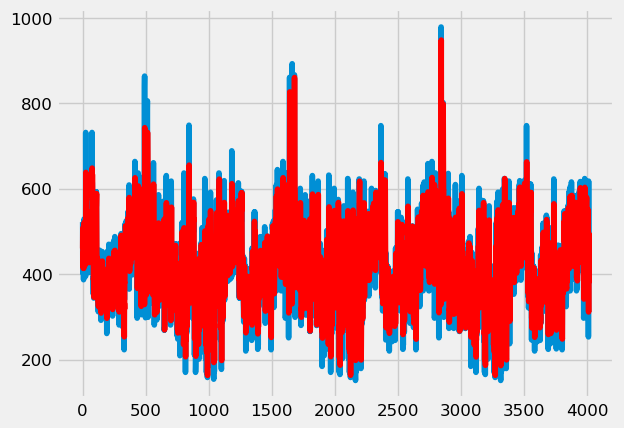

In [25]:
# Fitting the data and predicting for time series model
# split into train and test sets
X = y.values
train, test = np.split(X, [int(.67 *len(X))])
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [26]:
print(model_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3350      0.007    -47.386      0.000      -0.349      -0.321
ar.L2         -0.2205      0.007    -30.458      0.000      -0.235      -0.206
sigma2      5807.5762     44.078    131.758      0.000    5721.185    5893.967


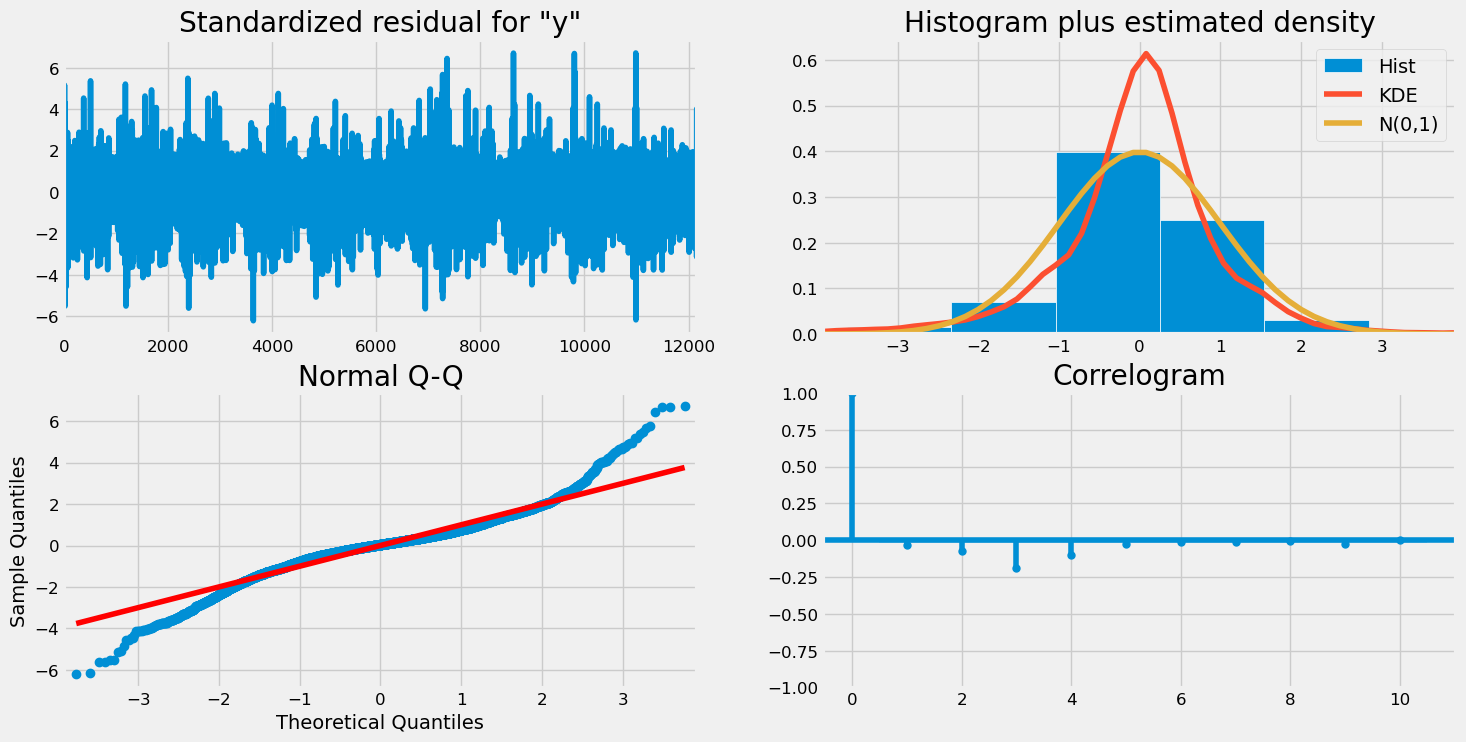

In [27]:
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

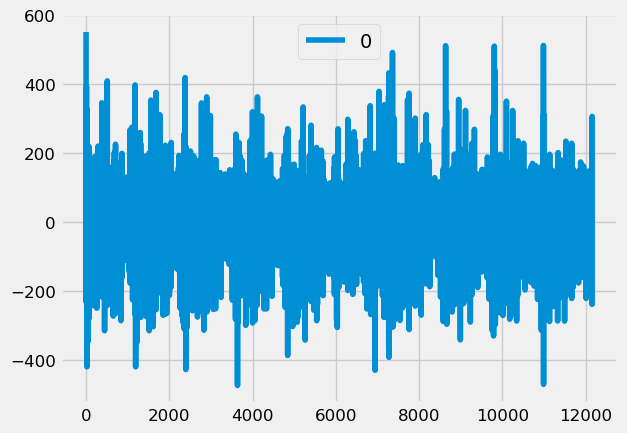

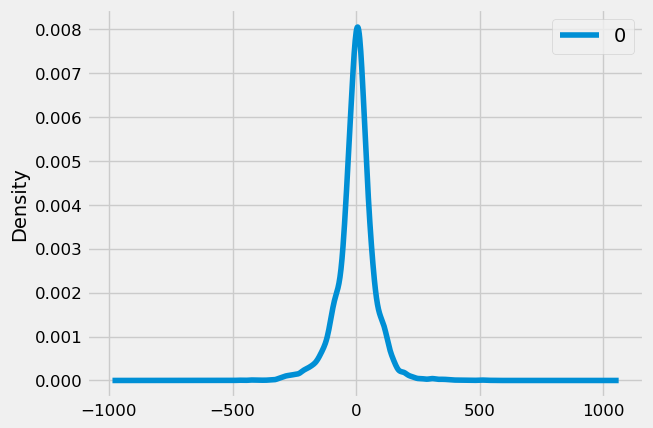

                  0
count  12160.000000
mean       0.027684
std       76.365601
min     -473.603742
25%      -33.112695
50%        3.632984
75%       36.913153
max      551.000000


In [28]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())